<a href="https://colab.research.google.com/github/mksantos2/information-retrieval-assignments/blob/main/IR_Trabalho_1_PyTerrier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Trabalho de Teste de um Sistema de Recuperação de Informações: *PyTerrier*
-------------------------------------
*Notebook desenvolvido por Lana e Moniele.*

Para executar este notebook faça: 


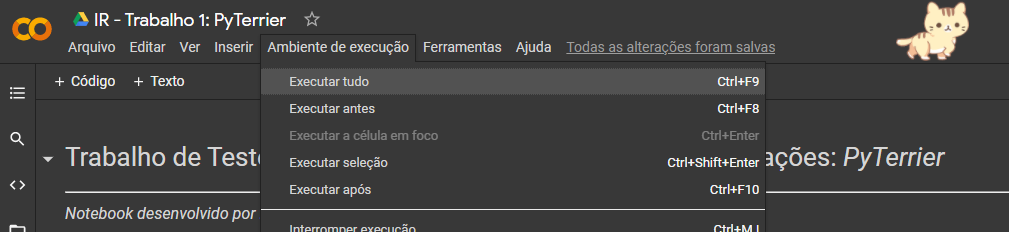

#### Sobre o PyTerrier 

*Esse framework propõe diferentes pipelines utilizando Classes Python para tarefas de Recuperação de Informações, como recuperação, reclassificação do Learn-to-Rank, reescrita da consulta, indexação, extração dos recursos subjacentes e reclassificação neural. Um sistema de recuperação de informações end-to-end pode ser facilmente construído com esses elementos de pipeline pré-estabelecidos. Além disso, uma arquitetura IR construída pode ser escalada ou estendida no futuro de acordo com os requisitos.*

Documentação: https://pyterrier.readthedocs.io/en/latest/

Artigo publicado: https://arxiv.org/abs/2007.14271 


A arquitetura de recuperação do PyTerrier é baseada em três conceitos:

- Pandas Dataframes com tipos predefinidos (cada um com um conjunto mínimo de atributos conhecidos).
- a transformação desses dataframes por operações padrão de recuperação de informações, definidas como transformers.
- a combinação de transformers, que apoiadas pelos seus operadores definidos, podem fornecer pipelines complexos de recuperação.

Em essência, um transformer PyTerrier é uma classe com um método transform(), que recebe como entrada um dataframe e o altera antes de retorná-lo.




## Dependências para utilizar o PyTerrier: 

- Instalar o framework via `pip install python-terrier`
- O pyterrier precisa ter a versão 11 do Java para funcionar, portanto se o notebook for rodado localmente é necessário ter o `JAVA_HOME` nas variáveis de ambiente.
- Além disso, é requisito executar o comando `pt.init()` antes de utilizar qualquer outra função ou classe do pyterrier.

In [ ]:
!pip install python-terrier
#!pip install --upgrade git+https://github.com/terrier-org/pyterrier.git#egg=python-terrier

     |████████████████████████████████| 95 kB 2.1 MB/s 
     |████████████████████████████████| 1.1 MB 42.8 MB/s 
     |████████████████████████████████| 69 kB 6.6 MB/s 
     |████████████████████████████████| 222 kB 49.1 MB/s 
     |████████████████████████████████| 1.8 MB 50.5 MB/s 
     |████████████████████████████████| 636 kB 50.7 MB/s 
     |████████████████████████████████| 6.3 MB 37.6 MB/s 
     |████████████████████████████████| 294 kB 65.0 MB/s 
     |████████████████████████████████| 126 kB 62.4 MB/s 
     |████████████████████████████████| 72 kB 1.5 MB/s 
     |████████████████████████████████| 291 kB 51.1 MB/s 
     |████████████████████████████████| 45 kB 2.6 MB/s 
  Created wheel for python-terrier: filename=python_terrier-0.7.0-py3-none-any.whl size=102213 sha256=8033b044e55b7c50ebf677a458eb605fda17ce2b6163abb742aec63037db4124
  Stored in directory: /root/.cache/pip/wheels/e3/84/1e/68c08f14e2481e2b3e7c1a2c24bb1220712bc3f5d3896c28df
  Created wheel for ir-measures: filen

*Iniciando o pyterrier...*

In [ ]:
import pyterrier as pt
if not pt.started():
  pt.init()

terrier-assemblies 5.6  jar-with-dependencies not found, downloading to /root/.pyterrier...
Done
terrier-python-helper 0.0.6  jar not found, downloading to /root/.pyterrier...
Done
PyTerrier 0.7.0 has loaded Terrier 5.6 (built by craigmacdonald on 2021-09-17 13:27)


### Carregando os Dados 

In [ ]:
!wget https://www.dropbox.com/s/va44q299g0edx34/collection.zip?dl=0

--2021-10-04 14:26:29--  https://www.dropbox.com/s/va44q299g0edx34/collection.zip?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.5.18, 2620:100:601d:18::a27d:512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.5.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/va44q299g0edx34/collection.zip [following]
--2021-10-04 14:26:30--  https://www.dropbox.com/s/raw/va44q299g0edx34/collection.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc8b7f24bf4e03170c1deae84098.dl.dropboxusercontent.com/cd/0/inline/BXaUt_JcxjWGQZEMsA8nFFWWdEnM_1Uzu3grWqSd2uvvj_jCoJiWllUVb_VOEJV1LrQwyNIjQCSGTMDZv9IEkzW36Km42yy1TbIntoI9_T8XFwd4lfu6YVgh9yQ1UROW5jlv7D--yc-Yy34HktNDZDg4/file# [following]
--2021-10-04 14:26:30--  https://uc8b7f24bf4e03170c1deae84098.dl.dropboxusercontent.com/cd/0/inline/BXaUt_JcxjWGQZEMsA8nFFWWdEnM_1Uzu3grWqSd2uvvj_jCoJiWllUVb_VOEJV1LrQwyNIjQCSGTMD

In [ ]:
!unzip "/content/collection.zip?dl=0" -d "/content/collection" 

Archive:  /content/collection.zip?dl=0
  inflating: /content/collection/Consultas_UTF8.txt  
   creating: /content/collection/docs/
  inflating: /content/collection/docs/FSP.950101.sgml  
  inflating: /content/collection/docs/FSP.950102.sgml  
  inflating: /content/collection/docs/FSP.950103.sgml  
  inflating: /content/collection/docs/FSP.950104.sgml  
  inflating: /content/collection/docs/FSP.950105.sgml  
  inflating: /content/collection/docs/FSP.950106.sgml  
  inflating: /content/collection/docs/FSP.950107.sgml  
  inflating: /content/collection/docs/FSP.950108.sgml  
  inflating: /content/collection/docs/FSP.950109.sgml  
  inflating: /content/collection/docs/FSP.950110.sgml  
  inflating: /content/collection/docs/FSP.950111.sgml  
  inflating: /content/collection/docs/FSP.950112.sgml  
  inflating: /content/collection/docs/FSP.950113.sgml  
  inflating: /content/collection/docs/FSP.950114.sgml  
  inflating: /content/collection/docs/FSP.950115.sgml  
  inflating: /content/collec

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

Cria pasta onde serão armazenados os resultados

In [ ]:
!mkdir results

# Indexação

Aqui estaremos utilizando o método `TRECCollectionIndexer` do PyTerrier para indexar os documentos.

 - `index_path` sinaliza o caminho onde ficará o índice.
 - `find_files()` busca de forma automática pelos documentos dentro do repositório especificado pelo caminho `files_path`.


In [ ]:
index_path = "./index"
files_path = '/content/collection/docs'
files = pt.io.find_files(files_path)

!rm -rf ./index
indexer = pt.TRECCollectionIndexer(index_path, verbose=True)

Depois de criado, é feito um ajuste no índice, onde chamamos um tokenizador universal `UTFTokeniser` para tokenizar os textos em português. Também configuramos um stemmer para língua potuguesa chamado `PortugueseSnowballStemmer`.


In [ ]:
indexer.setProperty("tokeniser", "UTFTokeniser") 
indexer.setProperty("termpipelines", "PortugueseSnowballStemmer")

Indexamos os documentos ao chamar o método `index()` dentro do objeto TRECCollectionIndexer.

In [ ]:
indexref = indexer.index(files)

  0%|          | 0/365 [00:00<?, ?files/s]

In [ ]:
indexref.toString()

'./index/data.properties'


É possível acessar informações sobre o índice, tais como as estatísticas do índice. Isso é feito através da chamada do método `getCollectionStatistics()`. Então podemos visualizar a quantidade de documentos, o número de termos, número de posting, etc.


In [ ]:
index = pt.IndexFactory.of(indexref)
print(index.getCollectionStatistics().toString())

Number of documents: 52038
Number of terms: 96825
Number of postings: 10070943
Number of fields: 0
Number of tokens: 20643664
Field names: []
Positions:   false



Agora, repetindo todo o processo fazendo a indexação sem o stemmer para futuros testes.

In [ ]:
index_path_nostem = "./index2"
indexer_nostem = pt.TRECCollectionIndexer(index_path_nostem, verbose=True)
indexer_nostem.setProperty("tokeniser", "UTFTokeniser") 
indexer_nostem.setProperty("termpipelines", "")
indexref_nostem = indexer_nostem.index(files)
index_nostem = pt.IndexFactory.of(indexref_nostem)

  0%|          | 0/365 [00:00<?, ?files/s]

# Recuperação

Agora podemos avançar para a recuperação, utilizando esse índice que acabamos de criar. A recuperação ou rankeamento de documentos é feita através do objeto `BatchRetrieve`, chamando o método `search()` que recebe como parâmetro uma ou mais consultas. Vamos fazer um rápido teste, passando a consulta `'dia'` para o método `search()`. 

BatchRetrieve retorna um *dataframe* Pandas.


In [ ]:
pt.BatchRetrieve(indexref, properties={'tokeniser': 'UTFTokeniser', 'termpipelines': "PortugueseSnowballStemmer"}).search("dia")

,qid,docid,docno,rank,score,query
0,1,50258,FSP951219-121,0,4.646160,dia
1,1,46867,FSP951127-140,1,4.430277,dia
2,1,6690,FSP950219-097,2,4.339188,dia
3,1,46866,FSP951127-139,3,4.248248,dia
4,1,17288,FSP950502-034,4,4.237451,dia
...,...,...,...,...,...,...
995,1,22126,FSP950606-067,995,2.690647,dia
996,1,40177,FSP951014-070,996,2.690647,dia
997,1,17675,FSP950505-057,997,2.689940,dia
998,1,25314,FSP950630-056,998,2.689287,dia


## Recuperando Documentos Utilizando os Tópicos


*Carregando os tópicos*

O método `read_topics()` percorre o arquivo de tópicos e concatena o **título, descrição e narrativa** de cada tópico em uma única consulta.

In [ ]:
topics_path = "/content/collection/Consultas_UTF8.txt"
topics = pt.io.read_topics(topics_path)
topics.head()

,qid,query
0,251,medicina alternativa encontrar documentos sobr...
1,252,sistemas de reforma e pensões na europa encont...
2,253,países com pena de morte em quais países ainda...
3,254,danos provocados por terramotos encontrar docu...
4,255,viciados na internet o uso frequente da intern...


In [ ]:
print("O número total de tópicos é :", len(topics))

O número total de tópicos é : 50


###Amostra de um Tópico

In [ ]:
topics['query'][48]

'riscos das missões de manutenção de paz da onu encontrar documentos relatando casos em que os elementos das tropas de manutenção de paz das nações unidas os chamados capacetes azuis foram feitos reféns feridos ou mortos documentos relevantes devem fornecer pormenores sobre incidentes nos quais as vidas de militares pertencendo às tropas de manutenção de paz da onu foram postas em risco ou ameaçadas'

## Rankeando Documentos sem Stemming

Passando os dicionários `controls` e `properties` podemos personalizar o rankeamento, configurando o modelo de classificação e o tokenizador, respectivamente. Depois, o método `tranform` recebe como argumento os tópicos lidos anteriormente.
O argumento `wmodel` indica o modelo de ponderação. O modelo escolhido que maximiza o score é o `LemurTF_IDF` que implementa o TF_IDF conforme implementado no Projeto Lemur.

In [ ]:
#retr = pt.BatchRetrieve(index_nostem, controls = {"wmodel": "TF_IDF"}, properties={'tokeniser': 'UTFTokeniser', 'termpipelines': ''}) #20.00
#retr = pt.BatchRetrieve(index_nostem, controls = {"wmodel": "DirichletLM"}, properties={'tokeniser': 'UTFTokeniser', 'termpipelines': ''}) #34.07
#retr = pt.BatchRetrieve(index_nostem, controls = {"wmodel": "BB2"}, properties={'tokeniser': 'UTFTokeniser', 'termpipelines': ''}) #39.97
#retr = pt.BatchRetrieve(index_nostem, controls = {"wmodel": "DFIC"}, properties={'tokeniser': 'UTFTokeniser', 'termpipelines': ''}) #29.07
#retr = pt.BatchRetrieve(index_nostem, controls = {"wmodel": "DFRee"}, properties={'tokeniser': 'UTFTokeniser', 'termpipelines': ''}) #41.98
#retr = pt.BatchRetrieve(index_nostem, controls = {"wmodel": "DFReeKLIM"}, properties={'tokeniser': 'UTFTokeniser', 'termpipelines': ''}) #27.83
#retr = pt.BatchRetrieve(index_nostem, controls = {"wmodel": "Js_KLs"}, properties={'tokeniser': 'UTFTokeniser', 'termpipelines': ''}) #40.37
retr = pt.BatchRetrieve(index_nostem, controls = {"wmodel": "LemurTF_IDF"}, properties={'tokeniser': 'UTFTokeniser', 'termpipelines': ''}) #126.40
#retr = pt.BatchRetrieve(index_nostem, controls = {"wmodel": "LGD"}, properties={'tokeniser': 'UTFTokeniser', 'termpipelines': ''}) #33.84

res = retr.transform(topics)

In [ ]:
res

,qid,docid,docno,rank,score,query
0,251,10181,FSP950315-114,0,126.402107,medicina alternativa encontrar documentos sobr...
1,251,34257,FSP950903-099,1,70.124867,medicina alternativa encontrar documentos sobr...
2,251,35428,FSP950911-054,2,68.995063,medicina alternativa encontrar documentos sobr...
3,251,32735,FSP950823-112,3,66.341721,medicina alternativa encontrar documentos sobr...
4,251,17356,FSP950502-102,4,62.661431,medicina alternativa encontrar documentos sobr...
...,...,...,...,...,...,...
49995,300,31047,FSP950812-042,995,14.108673,prémios na lotaria encontrar documentos sobre ...
49996,300,14212,FSP950410-023,996,14.089455,prémios na lotaria encontrar documentos sobre ...
49997,300,38602,FSP951003-085,997,14.087267,prémios na lotaria encontrar documentos sobre ...
49998,300,39141,FSP951007-060,998,14.086087,prémios na lotaria encontrar documentos sobre ...


## Expansão e Reescrita de Consulta 

Reescrita de consulta refere-se ao ato da reformulação das consultas e tem como objetivo melhorar o desempenho do ranqueamento da busca. Para isso, PyTerrier utiliza o modelo probabilístico Divergence from Randomness (DFR). 
Ele é baseado no modelo de indexação 2-Poisson. E esse modelo tem como hipótese que o nível de documentos relevantes está relacionado a um conjunto de documentos que contém uma quantidade maior de palavras informativas do que o resto dos documentos (fonte: [Wikipedia](https://en.wikipedia.org/wiki/Divergence-from-randomness_model)).







Dentre os modelos de Divergência de Aleatoriedade implementados no Terrier¹, podemos escolher as seguintes opções:

*   BA 
*   Bo1
*   Bo2
*   Information
*   KL
*   KLComplete
*   KLCorrect

¹http://terrier.org/docs/current/javadoc/org/terrier/matching/models/queryexpansion/package-summary.html


O trecho de código que sinaliza a expansão da consulta é `"qe" : "on"` e o que configura o modelo de Divergência de Aleatoriedade é `"qemodel" : "Bo1"`.

O pipeline funciona da seguinte forma 

    pipelineQE = wmodel >> qemodel >> wmodel

In [ ]:
#retr = pt.BatchRetrieve(index_nostem, controls = {"wmodel": "LemurTF_IDF","qemodel" : "BA", "qe" : "on"}, properties={'tokeniser': 'UTFTokeniser', 'termpipelines': ''}) #278
#retr = pt.BatchRetrieve(index_nostem, controls = {"wmodel": "LemurTF_IDF","qemodel" : "Bo1", "qe" : "on"}, properties={'tokeniser': 'UTFTokeniser', 'termpipelines': ''}) #281
#retr = pt.BatchRetrieve(index_nostem, controls = {"wmodel": "LemurTF_IDF","qemodel" : "Bo2", "qe" : "on"}, properties={'tokeniser': 'UTFTokeniser', 'termpipelines': ''}) #145
retr = pt.BatchRetrieve(index_nostem, controls = {"wmodel": "LemurTF_IDF","qemodel" : "Information", "qe" : "on"}, properties={'tokeniser': 'UTFTokeniser', 'termpipelines': ''}) #305
#retr = pt.BatchRetrieve(index_nostem, controls = {"wmodel": "LemurTF_IDF","qemodel" : "KL", "qe" : "on"}, properties={'tokeniser': 'UTFTokeniser', 'termpipelines': ''}) #264
#retr = pt.BatchRetrieve(index_nostem, controls = {"wmodel": "LemurTF_IDF","qemodel" : "KLComplete", "qe" : "on"}, properties={'tokeniser': 'UTFTokeniser', 'termpipelines': ''}) #271
#retr = pt.BatchRetrieve(index_nostem, controls = {"wmodel": "LemurTF_IDF","qemodel" : "KLCorrect", "qe" : "on"}, properties={'tokeniser': 'UTFTokeniser', 'termpipelines': ''}) #159


res_qe = retr.transform(topics)

In [ ]:
res_qe

,qid,docid,docno,rank,score,query
0,251,10181,FSP950315-114,0,305.430486,medicina alternativa encontrar documentos sobr...
1,251,34257,FSP950903-099,1,263.821727,medicina alternativa encontrar documentos sobr...
2,251,35428,FSP950911-054,2,260.545804,medicina alternativa encontrar documentos sobr...
3,251,34260,FSP950903-102,3,192.592022,medicina alternativa encontrar documentos sobr...
4,251,46184,FSP951123-169,4,152.939025,medicina alternativa encontrar documentos sobr...
...,...,...,...,...,...,...
49995,300,40098,FSP951013-120,995,36.205893,prémios na lotaria encontrar documentos sobre ...
49996,300,16192,FSP950424-034,996,36.188452,prémios na lotaria encontrar documentos sobre ...
49997,300,15269,FSP950417-093,997,36.181994,prémios na lotaria encontrar documentos sobre ...
49998,300,51630,FSP951229-121,998,36.175388,prémios na lotaria encontrar documentos sobre ...


###Filtragem dos resultados

Aqui, são filtrados os 100 primeiros documentos retornados para cada uma das 50 consultas. Também, o dataframe é ajustado para o padrão de saída exigido.

In [ ]:
df = res_qe.copy()

df = df.drop(df[(df['rank'] > 99)].index)

# cria novas colunas 
df = df.assign(lana_moniele = 'lana_moniele')
df.insert(1, "Q0", "Q0", allow_duplicates = False)

# exclui colunas desnecessárias
df = df.drop(['query', 'docid'], axis = 'columns')

df

,qid,Q0,docno,rank,score,lana_moniele
0,251,Q0,FSP950315-114,0,305.430486,lana_moniele
1,251,Q0,FSP950903-099,1,263.821727,lana_moniele
2,251,Q0,FSP950911-054,2,260.545804,lana_moniele
3,251,Q0,FSP950903-102,3,192.592022,lana_moniele
4,251,Q0,FSP951123-169,4,152.939025,lana_moniele
...,...,...,...,...,...,...
49095,300,Q0,FSP950402-004,95,51.334128,lana_moniele
49096,300,Q0,FSP950727-056,96,51.312205,lana_moniele
49097,300,Q0,FSP950816-086,97,51.256919,lana_moniele
49098,300,Q0,FSP950712-040,98,51.250769,lana_moniele


Por fim, o arquivo é armazenado na pasta local do Colab `/results`



In [ ]:
import numpy as np

np.savetxt(r'/content/results/LemurTF_IDF_without_stem.txt', df.values, fmt='%s')
#np.savetxt(r'/content/results/BM25_without_stem.txt', df.values, fmt='%s')

## Rankeando Documentos com Stemming 

Dessa vez, um experimento é feito utilizando o stemmer `PortugueseSnowballStemmer` disponibilizado pelo PyTerrier para melhorar o desempenho do sistema.

In [ ]:
#retr = pt.BatchRetrieve(index, controls = {"wmodel": "TF_IDF"}, properties={'tokeniser': 'UTFTokeniser', 'termpipelines': 'PortugueseSnowballStemmer'}) #19.57 
#retr = pt.BatchRetrieve(index, controls = {"wmodel": "DirichletLM"}, properties={'tokeniser': 'UTFTokeniser', 'termpipelines': 'PortugueseSnowballStemmer'}) #29.90
#retr = pt.BatchRetrieve(index, controls = {"wmodel": "BB2"}, properties={'tokeniser': 'UTFTokeniser', 'termpipelines': 'PortugueseSnowballStemmer'}) #40.57
#retr = pt.BatchRetrieve(index, controls = {"wmodel": "DFIC"}, properties={'tokeniser': 'UTFTokeniser', 'termpipelines': 'PortugueseSnowballStemmer'}) #29.73
#retr = pt.BatchRetrieve(index, controls = {"wmodel": "DFRee"}, properties={'tokeniser': 'UTFTokeniser', 'termpipelines': 'PortugueseSnowballStemmer'}) #42.03
#retr = pt.BatchRetrieve(index, controls = {"wmodel": "DFReeKLIM"}, properties={'tokeniser': 'UTFTokeniser', 'termpipelines': 'PortugueseSnowballStemmer'}) #27.63
#retr = pt.BatchRetrieve(index, controls = {"wmodel": "Js_KLs"}, properties={'tokeniser': 'UTFTokeniser', 'termpipelines': 'PortugueseSnowballStemmer'}) #40.69
retr = pt.BatchRetrieve(index, controls = {"wmodel": "LemurTF_IDF"}, properties={'tokeniser': 'UTFTokeniser', 'termpipelines': 'PortugueseSnowballStemmer'}) #98.98
#retr = pt.BatchRetrieve(index, controls = {"wmodel": "LGD"}, properties={'tokeniser': 'UTFTokeniser', 'termpipelines': 'PortugueseSnowballStemmer'}) #33.25

res_stem = retr.transform(topics)

In [ ]:
retr = pt.BatchRetrieve(index, controls = {"wmodel": "TF_IDF"}, properties={'tokeniser': 'UTFTokeniser', 'termpipelines': 'PortugueseSnowballStemmer'}) 
retr = pt.BatchRetrieve(index, controls = {"wmodel": "DirichletLM"}, properties={'tokeniser': 'UTFTokeniser', 'termpipelines': 'PortugueseSnowballStemmer'})
retr = pt.BatchRetrieve(index, controls = {"wmodel": "DFReeKLIM"}, properties={'tokeniser': 'UTFTokeniser', 'termpipelines': 'PortugueseSnowballStemmer'}) 
retr = pt.BatchRetrieve(index, controls = {"wmodel": "LemurTF_IDF"}, properties={'tokeniser': 'UTFTokeniser', 'termpipelines': 'PortugueseSnowballStemmer'}) 

In [ ]:
res_stem

,qid,docid,docno,rank,score,query
0,251,10181,FSP950315-114,0,98.989210,medicina alternativa encontrar documentos sobr...
1,251,34257,FSP950903-099,1,79.105575,medicina alternativa encontrar documentos sobr...
2,251,35428,FSP950911-054,2,68.600649,medicina alternativa encontrar documentos sobr...
3,251,44327,FSP951111-086,3,64.956070,medicina alternativa encontrar documentos sobr...
4,251,34260,FSP950903-102,4,60.191222,medicina alternativa encontrar documentos sobr...
...,...,...,...,...,...,...
49995,300,20483,FSP950525-075,995,15.720411,prémios na lotaria encontrar documentos sobre ...
49996,300,14279,FSP950410-090,996,15.710514,prémios na lotaria encontrar documentos sobre ...
49997,300,46423,FSP951125-050,997,15.708633,prémios na lotaria encontrar documentos sobre ...
49998,300,41062,FSP951020-023,998,15.704430,prémios na lotaria encontrar documentos sobre ...


Novamente são filtrados os 100 primeiros documentos e o dataframe é ajustado para o padrão de saída exigido.

## Expansão e Reescrita de Consulta 

É feito novamente a etapa de expansão de consulta, utilizando o modelo `Information`.

In [ ]:
retr = pt.BatchRetrieve(index, controls = {"wmodel": "LemurTF_IDF", "qemodel" : "Information", "qe" : "on"}, properties={'tokeniser': 'UTFTokeniser', 'termpipelines': 'PortugueseSnowballStemmer'}) #164


res_stem_qe = retr.transform(topics)

In [ ]:
res_stem_qe

,qid,docid,docno,rank,score,query
0,251,35428,FSP950911-054,0,164.118028,medicina alternativa encontrar documentos sobr...
1,251,34257,FSP950903-099,1,133.590105,medicina alternativa encontrar documentos sobr...
2,251,46184,FSP951123-169,2,101.899792,medicina alternativa encontrar documentos sobr...
3,251,39918,FSP951012-084,3,99.525551,medicina alternativa encontrar documentos sobr...
4,251,40412,FSP951015-184,4,99.373157,medicina alternativa encontrar documentos sobr...
...,...,...,...,...,...,...
49995,300,41752,FSP951024-088,995,39.329080,prémios na lotaria encontrar documentos sobre ...
49996,300,33903,FSP950831-127,996,39.325009,prémios na lotaria encontrar documentos sobre ...
49997,300,26050,FSP950705-091,997,39.321968,prémios na lotaria encontrar documentos sobre ...
49998,300,12323,FSP950328-163,998,39.313675,prémios na lotaria encontrar documentos sobre ...


In [ ]:
df = res_stem_qe.copy()

df = df.drop(df[(df['rank'] > 99)].index)

# cria novas colunas 
df = df.assign(lana_moniele = 'lana_moniele')
df.insert(1, "Q0", "Q0", allow_duplicates = False)

# exclui colunas desnecessárias
df = df.drop(['query', 'docid'], axis = 'columns')

df

,qid,Q0,docno,rank,score,lana_moniele
0,251,Q0,FSP950911-054,0,164.118028,lana_moniele
1,251,Q0,FSP950903-099,1,133.590105,lana_moniele
2,251,Q0,FSP951123-169,2,101.899792,lana_moniele
3,251,Q0,FSP951012-084,3,99.525551,lana_moniele
4,251,Q0,FSP951015-184,4,99.373157,lana_moniele
...,...,...,...,...,...,...
49095,300,Q0,FSP950322-112,95,51.667013,lana_moniele
49096,300,Q0,FSP950801-055,96,51.606426,lana_moniele
49097,300,Q0,FSP951224-001,97,51.470007,lana_moniele
49098,300,Q0,FSP950328-085,98,51.377773,lana_moniele


In [ ]:
import numpy as np

np.savetxt(r'/content/results/LemurTF_IDF_with_stem.txt', df.values, fmt='%s')
#np.savetxt(r'/content/results/TF_IDF_with_stem.txt', df.values, fmt='%s')

## Exportanto os Resultados

Primeiro é feita uma compressão dos resultados obtidos para .zip

In [ ]:
!zip -r /content/out.zip /content/results

  adding: content/results/ (stored 0%)
  adding: content/results/LemurTF_IDF_with_stem.txt (deflated 70%)
  adding: content/results/LemurTF_IDF_without_stem.txt (deflated 70%)


Então podemos baixar localmente o arquivo zipado.

In [ ]:
from google.colab import files
files.download("/content/out.zip")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Considerações Finais 

PyTerrier é um sistema simples e de fácil aprendizagem e execução, não sendo necessário muito esforço para escrever e entender o código. Sua principal destaque é conseguir paralelizar as execuções quando há a necessidade de comparar vários modelos. 
Além disso, ele consegue lidar com vários tipos de arquivos de entrada que posteriormente são facilmente convertidos para dataframes, facilitando as operações com os transformers. 


Ainda, apresenta métodos de expansão e reescrita de consulta, que aumentam a efetividade da busca e ranqueamento. Por fim, dá suporte para utilizar modelos Neural Reranking como ColBERT e MonoT5. 
Contudo, o maior ponto fraco do framework está na parte do pré-processamento, pois não é possível personalizar de forma trivial etapas como remoção de stopwords e escolha do stemmer.


##Avaliação do Sistema (em breve)


```python
qrels_path=("./qrels")
qrels = pt.io.read_qrels(qrels_path)

#Avaliação geral
eval = pt.Utils.evaluate(res,qrels)
eval

#Avaliação por tópico
eval = pt.Utils.evaluate(res,qrels,metrics=["map"], perquery=True)
eval
```


In [ ]:
'''
qrels_path=("/content/qrels_FSP2021.txt")
qrels = pt.io.read_qrels(qrels_path)

#Avaliação geral
eval_vanilla = pt.Utils.evaluate(res_qe,qrels)
eval_stemmed = pt.Utils.evaluate(res_stem_qe,qrels)

print("Evaluation vanilla system: ", eval_vanilla)
print("Evaluation stemmed system: ", eval_stemmed)
'''


'\nqrels_path=("/content/qrels_FSP2021.txt")\nqrels = pt.io.read_qrels(qrels_path)\n\n#Avaliação geral\neval_vanilla = pt.Utils.evaluate(res_qe,qrels)\neval_stemmed = pt.Utils.evaluate(res_stem_qe,qrels)\n\nprint("Evaluation vanilla system: ", eval_vanilla)\nprint("Evaluation stemmed system: ", eval_stemmed)\n'